# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [62]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import cufflinks as cf
%matplotlib inline

In [61]:
# !pip install cufflinks

     |████████████████████████████████| 81 kB 849 kB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=b0bef588e8998d92c39709a66b368c24c72f50a0094a5cd04b5b5b54d7836ca4
  Stored in directory: /home/sangdh/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
Successfully built cufflinks


In [6]:
matches_dataframe = pd.read_csv('matches.csv').dropna()
players_dataframe = pd.read_csv('players.csv').dropna()
winners_dataframe = pd.read_csv('winners.csv').dropna()

# Clean data

In [10]:
matches_dataframe.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [11]:
matches_dataframe.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [12]:
players_dataframe.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
113,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70'
415,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83'
468,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40'


In [13]:
players_dataframe.tail()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37658,255955,300186490,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,O96'
37693,255957,300186502,NED,Louis VAN GAAL (NED),S,1,CILLESSEN,GK,O90'
37694,255957,300186502,BRA,SCOLARI Luiz Felipe (BRA),S,3,T SILVA,C,Y2'
37705,255957,300186502,NED,Louis VAN GAAL (NED),S,9,V. PERSIE,C,P3'
37715,255957,300186502,NED,Louis VAN GAAL (NED),N,22,VORM,GK,I90'


In [14]:
winners_dataframe.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [15]:
winners_dataframe.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


In [18]:
matches_dataframe['Home Team Name'].value_counts()

Brazil                       82
Italy                        57
Argentina                    54
Germany FR                   43
England                      35
                             ..
Haiti                         1
IR Iran                       1
China PR                      1
Bolivia                       1
rn">Serbia and Montenegro     1
Name: Home Team Name, Length: 78, dtype: int64

In [20]:
names = matches_dataframe[matches_dataframe['Home Team Name'].
        str.contains('rn">')]['Home Team Name'].value_counts()

In [21]:
names

rn">Republic of Ireland       5
rn">United Arab Emirates      1
rn">Bosnia and Herzegovina    1
rn">Serbia and Montenegro     1
rn">Trinidad and Tobago       1
Name: Home Team Name, dtype: int64

In [25]:
wrong = list(names.index)
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago']

In [33]:
correct = [name.split('>')[1] for name in wrong]

In [34]:
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Trinidad and Tobago']

In [35]:
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana']
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium']

In [36]:
wrong = wrong + old_name
correct = correct + new_name

In [37]:
wrong

['rn">Republic of Ireland',
 'rn">United Arab Emirates',
 'rn">Bosnia and Herzegovina',
 'rn">Serbia and Montenegro',
 'rn">Trinidad and Tobago',
 'Germany FR',
 'Maracan� - Est�dio Jornalista M�rio Filho',
 'Estadio do Maracana']

In [38]:
correct

['Republic of Ireland',
 'United Arab Emirates',
 'Bosnia and Herzegovina',
 'Serbia and Montenegro',
 'Trinidad and Tobago',
 'Germany',
 'Maracan Stadium',
 'Maracan Stadium']

In [40]:
for index, wr in enumerate(wrong):
    winners_dataframe = winners_dataframe.replace(wrong[index],correct[index])
    matches_dataframe = matches_dataframe.replace(wrong[index], correct[index])
    players_dataframe = players_dataframe.replace(wrong[index], correct[index])


In [41]:
names = matches_dataframe[matches_dataframe['Home Team Name'].
        str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

# Perform Exploratory Data Analysis on the dataset, Analyze the data more deeply and extract insights, Visualize your analysis on Google Data Studio

## Most Number of World Cup Winning Title

In [44]:
champions = winners_dataframe['Winner'].value_counts()
champions

Brazil       5
Germany      4
Italy        4
Argentina    2
Uruguay      2
France       1
England      1
Spain        1
Name: Winner, dtype: int64

In [45]:
runner_ups = winners_dataframe['Runners-Up'].value_counts()
runner_ups

Germany           4
Netherlands       3
Argentina         3
Czechoslovakia    2
Hungary           2
Brazil            2
Italy             2
France            1
Sweden            1
Name: Runners-Up, dtype: int64

In [46]:
thirds = winners_dataframe['Third'].value_counts()
thirds

Germany        4
France         2
Poland         2
Sweden         2
Brazil         2
Chile          1
Croatia        1
Netherlands    1
Turkey         1
Portugal       1
Austria        1
USA            1
Italy          1
Name: Third, dtype: int64

In [56]:
top3 = pd.concat([champions,runner_ups,thirds], axis=1)
top3.fillna(0, inplace=True)
top3 = top3.astype(int)
top3

,Winner,Runners-Up,Third
Brazil,5,2,2
Germany,4,4,4
Italy,4,2,1
Argentina,2,3,0
Uruguay,2,0,0
France,1,1,2
England,1,0,0
Spain,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [64]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [67]:
top3.iplot(kind='bar',xTitle='teams',yTitle='times', title='FIFA World Cup Winning Count')

## Number of Goal Per Countary

In [69]:
matches_dataframe.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [71]:
home = matches_dataframe[['Home Team Name', 'Home Team Goals']]
away = matches_dataframe[['Away Team Name', 'Away Team Goals']]
home

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
847,Netherlands,0.0
848,Brazil,1.0
849,Netherlands,0.0
850,Brazil,0.0


In [82]:
home.columns = ['Countries','Goals']
away.columns = home.columns

In [83]:
goals = home.append(away, ignore_index=True)

In [84]:
goals = goals.groupby('Countries').sum()
goals

,Goals
Countries,
Algeria,12.0
Angola,1.0
Argentina,133.0
Australia,11.0
Austria,43.0
...,...
United Arab Emirates,2.0
Uruguay,80.0
Wales,4.0


In [89]:
goals = goals.sort_values(by='Goals', ascending=False)
goals

,Goals
Countries,
Germany,231.0
Brazil,225.0
Argentina,133.0
Italy,128.0
France,108.0
...,...
Trinidad and Tobago,0.0
Canada,0.0
Dutch East Indies,0.0


In [90]:
goals[:30].iplot(kind='bar', xTitle='Countries',yTitle='Goals', title= 'Countries Hits Number of Goals')

## Attendance, Number of Teams, Goals, and Matches per Cup

In [93]:
winners_dataframe['Attendance'] = winners_dataframe['Attendance'].str.replace('.','')
winners_dataframe.head(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607


Text(0.5, 1.0, 'Matches Plyed Scored by Teams Per Year')

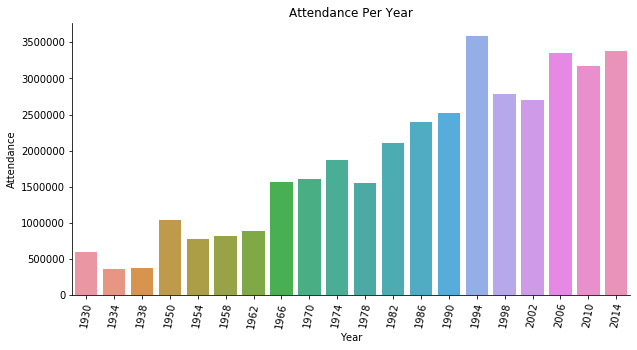

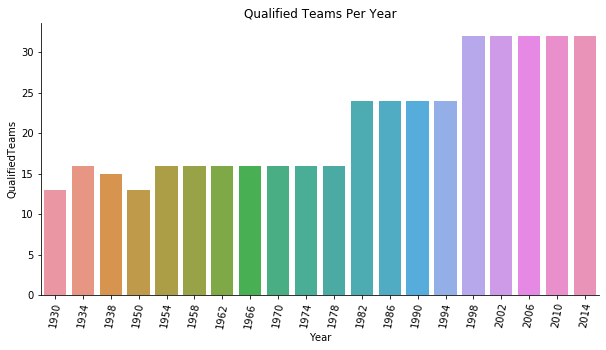

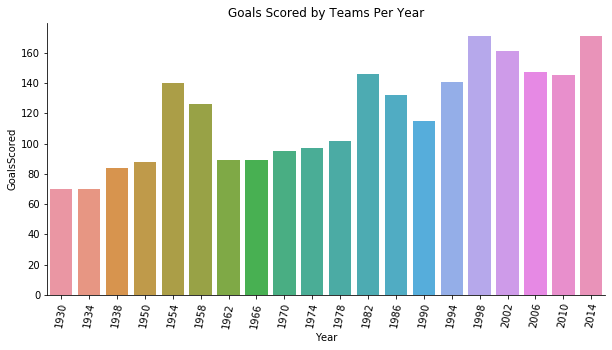

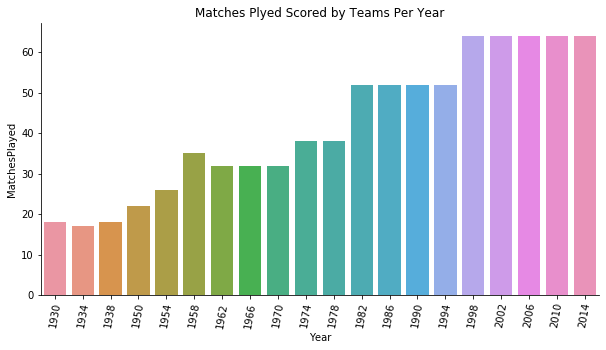

In [112]:
fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right=True)
g = sns.barplot(x = 'Year', y = 'Attendance', data = winners_dataframe)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Attendance Per Year')

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'QualifiedTeams', data = winners_dataframe)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Qualified Teams Per Year')

fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'GoalsScored', data = winners_dataframe)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Goals Scored by Teams Per Year')


fig, ax = plt.subplots(figsize = (10,5))
sns.despine(right = True)
g = sns.barplot(x = 'Year', y = 'MatchesPlayed', data = winners_dataframe)
g.set_xticklabels(g.get_xticklabels(), rotation = 80)
g.set_title('Matches Plyed Scored by Teams Per Year')

## Goals Per Team Per World Cup

In [114]:
matches_dataframe.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [115]:
home = matches_dataframe.groupby(['Year','Home Team Name'])['Home Team Goals'].sum()
home

Year    Home Team Name
1930.0  Argentina         16.0
        Brazil             4.0
        Chile              4.0
        France             4.0
        Paraguay           1.0
                          ... 
2014.0  Russia             1.0
        Spain              1.0
        Switzerland        4.0
        USA                2.0
        Uruguay            3.0
Name: Home Team Goals, Length: 366, dtype: float64

In [116]:
away = matches_dataframe.groupby(['Year', 'Away Team Name'])['Away Team Goals'].sum()
away

Year    Away Team Name
1930.0  Argentina         2.0
        Belgium           0.0
        Bolivia           0.0
        Brazil            1.0
        Chile             1.0
                         ... 
2014.0  Russia            1.0
        Spain             3.0
        Switzerland       3.0
        USA               4.0
        Uruguay           1.0
Name: Away Team Goals, Length: 411, dtype: float64

In [125]:
goals = pd.concat([home,away],axis=1)
goals

Home Team Goals  Away Team Goals
1930.0 Argentina               16.0              2.0
       Belgium                  NaN              0.0
       Bolivia                  NaN              0.0
       Brazil                   4.0              1.0
       Chile                    4.0              1.0
...                             ...              ...
2014.0 Russia                   1.0              1.0
       Spain                    1.0              3.0
       Switzerland              4.0              3.0
       USA                      2.0              4.0
       Uruguay                  3.0              1.0

[427 rows x 2 columns]

In [127]:
goals.fillna(0, inplace=True)
goals['Goals'] = goals['Home Team Goals'] + goals['Away Team Goals']
goals = goals.drop(labels = ['Home Team Goals', 'Away Team Goals'], axis = 1)
goals

Goals
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [128]:
goals = goals.reset_index()

In [129]:
goals.columns = ['Year', 'Country', 'Goals']
goals = goals.sort_values(by = ['Year', 'Goals'], ascending = [True, False])
goals

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
...,...,...,...
416,2014.0,Japan,2.0
422,2014.0,Russia,2.0
401,2014.0,Cameroon,1.0
413,2014.0,Honduras,1.0


In [138]:
top5 = goals.groupby('Year').head()
top5.head(10)

,Year,Country,Goals
0,1930.0,Argentina,18.0
11,1930.0,Uruguay,15.0
10,1930.0,USA,7.0
12,1930.0,Yugoslavia,7.0
3,1930.0,Brazil,5.0
22,1934.0,Italy,12.0
20,1934.0,Germany,11.0
17,1934.0,Czechoslovakia,9.0
14,1934.0,Austria,7.0
21,1934.0,Hungary,5.0


In [136]:
import plotly.graph_objects as go

In [137]:
x,y = goals['Year'].values, goals['Goals'].values

In [144]:
data = []
for team in top5['Country'].drop_duplicates().values:
    year = top5[top5['Country'] == team]['Year']
    goal = top5[top5['Country'] == team]['Goals']
    
    data.append(go.Bar(x = year, y = goal, name = team))
layout = go.Layout(barmode = 'stack', title = 'Top 5 Teams with most Goals', showlegend = False)

fig = go.Figure(data = data, layout = layout)
fig.show()